# SIN. Skaitinis integravimas.
### SIN1. Aproksimavimas nulinės eilės daugianariu
Skaitiniame integravime integruojamą funciją $f(x)$ keičiame funkcija $\varphi(x)$. Pasižymime skaičiuojamą integralą:
$$ I = \int_a^b f(x)dx, $$
kuriam integravimo srityje [a,b] pasirinktas žingsnio $h=x_{i+1} - x_i$, o aproksimuojama funkcija $\varphi(x)$ pasirenkama taip:
$$ \varphi(x) = f(\xi). $$

Tuomet:
$ I = \int_a^b f(x)dx = \int_a^b \varphi(x)dx + R = \sum_{i=0}^{n-1} h_i f(\xi_i) + R $

- Jei $ \xi_i = x_i $ - tai kairiųjų stačiakampių metodas (K);
- Jei $ \xi_i = x_{i+1} $ - tai dešiniųjų stačiakampių metodas (D);
- Jei $ \xi_i = \frac{x_i + x_{i+1}}{2} $ - tai vidurinių stačiakampių metodas (V);

$$ K = \sum_{i=0}^{n-1} h_i f(x_i), \quad D =  \sum_{i=0}^{n-1} h_i f(x_{i+1}), \quad V = \sum_{i=0}^{n-1} h_i f\left(\frac{x_i + x_{i+1}}{2}\right) $$


Jei tinklas tolydinis, t.y. $ h \equiv h_i = \frac{b-a}{n}$, tai:
$$ K = h\sum_{i=0}^{n-1} f(x_i), \quad D =  h\sum_{i=0}^{n-1} f(x_{i+1}), \quad V = h\sum_{i=0}^{n-1}f\left(\frac{x_i + x_{i+1}}{2}\right)$$

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
f = lambda t: t*np.sin(2*t) # Integration function
F = lambda t: (np.sin(2*t))/(4) + (t * ((2*(np.sin(t)**2)) -1))/(2)
a, b = 1, 1.5 # Integration interval
n = 10 # Number of integration points
I = F(b) - F(a)
h = (b-a)/n
x = [a+(i*h) for i in range(0,n+1)]

In [89]:
def K(H, X, function):
    return H * sum([ function(X[i]) for i in range(len(X)-1) ])

def D(H, X, function):
    return H * sum([ function(X[i+1]) for i in range(len(X)-1) ])

def V(H, X, function):
    return H * sum([ function((X[i]+X[i+1])/2) for i in range(len(X)-1) ])

def sant_err(i, x):
    return abs(i-x)

def abs_err(i, x):
    return sant_err(i,x)/abs(i)

def plot_err(n, title, legend, *args):
    plt.yscale("log")
    plt.title(title)
    for i in args:
        plt.plot(n, i)
    plt.legend(legend)
    plt.show()
    
def minMax(**kwargs):
    for i in kwargs:
        print(f"Max {i} paklaida: {max(kwargs[i])}")
        print(f"Min {i} paklaida: {min(kwargs[i])}")

In [90]:
k = K(h, x, f)
d = D(h, x, f)
v = V(h, x, f)

santykine_k = sant_err(I, k)
santykine_d = sant_err(I, d)
santykine_v = sant_err(I, v)

abs_k = abs_err(I, k)
abs_d = abs_err(I, d)
abs_v = abs_err(I, v)

print(f"Integralas K metodu: {k}")
print(f"Integralas D metodu: {d}")
print(f"Integralas V metodu: {v}")
print()
print(f"Santykine K paklaida: {santykine_k}")
print(f"Santykine D paklaida: {santykine_d}")
print(f"Santykine V paklaida: {santykine_v}")
print()
print(f"Absoliutine K paklaida: {abs_k}%")
print(f"Absoliutine D paklaida: {abs_d}%")
print(f"Absoliutine V paklaida: {abs_v}%")

Integralas K metodu: 0.359211492803261
Integralas D metodu: 0.32433062206646684
Integralas V metodu: 0.34267942837506327

Santykine K paklaida: 0.016834893317951627
Santykine D paklaida: 0.018045977418842507
Santykine V paklaida: 0.0003028288897539144

Absoliutine K paklaida: 0.049170689069461294%
Absoliutine D paklaida: 0.05270797550408179%
Absoliutine V paklaida: 0.0008844906170840924%


### SIN2. Lokalinis interpoliavimas pirmos eilės daugianariu (Trapecijų metodas).
Skaitiniame integravime integruojamą funciją $f(x)$ keičiame funkcija $\varphi(x)$. Pasižymime skaičiuojamą integralą:
$$ I = \int_a^b f(x)dx, $$
kuriam integravimo srityje [a,b] pasirinktas žingsnio $h=x_{i+1} - x_i$, o lokaliai interpoliuojančios funkcijos $P_i(x)$
pasirenkamos taip:
$$ P_i(x) = \frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_i}(x-x_i) + f(x_i). $$
Iš to gauname:
$$ I = \int_a^bf(x)dx = \frac{1}{2}\sum_{i=0}^{n-1}h_i \left[ f(x_i) + f(x_{i+1}) \right] + R $$
Jei tinklas tolydinis, t.y. $ h \equiv h_i = \frac{b-a}{n}$, tai:
$$ T = \frac{h}{2}\sum_{i=0}^{n-1}\left[ f(x_i) - f(x_{i+1}) \right].  $$

In [91]:
f = lambda t: t*np.sin(2*t) # Integration function
F = lambda t: (np.sin(2*t))/(4) + (t * ((2*(np.sin(t)**2)) -1))/(2)
a, b = 1, 1.5 # Integration interval
n = 10 # Number of integration points
I = F(b) - F(a)
h = (b-a)/n
x = [a+(i*h) for i in range(0,n+1)]

In [92]:
def T(H, X, F):
    return (H/2) * sum([ (F(X[i]) + F(X[i+1])) for i in range(len(X)-1) ])

In [93]:
t = T(h, x, f)
santykine_t = sant_err(I, t)
abs_t = abs_err(I, t)

print(f"Integralas T metodu: {t}")
print(f"Santykine T paklaida: {santykine_t}")
print(f"Absoliutine T paklaida: {abs_t}%")

Integralas T metodu: 0.3417710574348639
Santykine T paklaida: 0.0006055420504454401
Absoliutine T paklaida: 0.001768643217310249%


### SIN3. Lokalinis interpoliavimas antros eilės daugianariu (Simpsono metodas).
Naudojamas artinys:
$$ S_i = \int_{x_i}^{x_{i+1}} P_i(x)dx = \frac{h_i}{6} \left[ f(x_i) + 4f\left(\frac{x_i + x_{i+1}}{2}\right) \right] + f(x_{i+1}) $$

In [94]:
f = lambda t: t*np.sin(2*t) # Integration function
F = lambda t: (np.sin(2*t))/(4) + (t * ((2*(np.sin(t)**2)) -1))/(2)
a, b = 1, 1.5 # Integration interval
n = 10 # Number of integration points
I = F(b) - F(a)
h = (b-a)/n
x = [a+(i*h) for i in range(0,n+1)]

In [95]:
def S(H, X, F):
    return (h/6) * sum([ ( F(x[i]) + 4*F((X[i]+X[i+1])/2) + f(X[i+1]) ) for i in range(len(X)-1)])

In [96]:
s = S(h, x, f)
santykine_s = sant_err(I, s)
abs_s = abs_err(I, s)

print(f"Integralas S metodu: {s}")
print(f"Santykine S paklaida: {santykine_s}")
print(f"Absoliutine S paklaida: {abs_s}%")

Integralas S metodu: 0.34237663806166346
Santykine S paklaida: 3.8576354111086175e-08
Absoliutine S paklaida: 1.1267228592455661e-07%


### Paklaidų braižymas

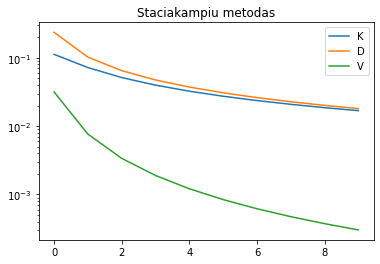

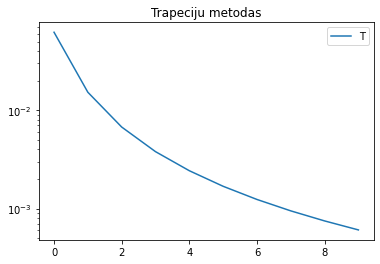

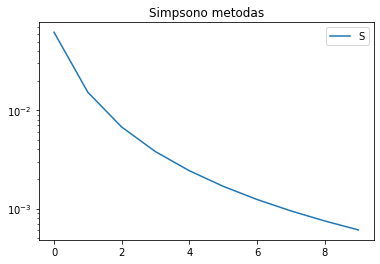

Max K paklaida: 0.1122721139275315
Min K paklaida: 0.016834893317951627
Max D paklaida: 0.23653659344040895
Min D paklaida: 0.018045977418842507
Max V paklaida: 0.03166849057966342
Min V paklaida: 0.0003028288897539144

Max T paklaida: 0.06213223975643872
Min T paklaida: 0.0006055420504454401

Max S paklaida: 0.06213223975643872
Min S paklaida: 0.0006055420504454401


In [97]:
x_space_k, x_space_d, x_space_v, x_space_t, x_space_s = [], [], [], [], []
err_space_k,err_space_d, err_space_v, err_space_t, err_space_s = [], [], [], [], []
integral = F(b) - F(a)

for i in range(n):
    x = np.linspace(1, 1.5, i + 2)
    h = (b - a) / (i + 1)
    
    x_k = K(h, x, f)
    x_space_k.append(x_k)
    err_space_k.append(sant_err(integral, x_k))

    x_d = D(h, x, f)
    x_space_d.append(x_d)
    err_space_d.append(sant_err(integral, x_d))
    
    x_v = V(h, x, f)
    x_space_v.append(x_v)
    err_space_v.append(sant_err(integral, x_v))
    
    x_t = T(h, x, f)
    x_space_t.append(x_t)
    err_space_t.append(sant_err(integral, x_t))
    
    x_s = T(h, x, f)
    x_space_s.append(x_s)
    err_space_s.append(sant_err(integral, x_s))
    
plot_err(range(n), 'Staciakampiu metodas', ('K', 'D', 'V'), err_space_k, err_space_d, err_space_v)
plot_err(range(n), 'Trapeciju metodas', 'T', err_space_t)
plot_err(range(n), 'Simpsono metodas', 'S', err_space_s)

minMax(K=err_space_k, D=err_space_d, V=err_space_v)
print()
minMax(T=err_space_t)
print()
minMax(S=err_space_s)